# Here are news in german language parsed from Telegram Channels

## Here we groom the data

### we used the following channels:
* Frankfurter Zeitung
* Tagesschau Nachrichten
* Die Weltwoche


In [1]:
import pandas as pd
df2 = pd.io.json.read_json('channel_messages.json')

In [2]:
df2['length'] = df2['message'].apply(lambda x: len(str(x)))
df2 = df2.drop(df2[df2.length ==0].index)
df2['date'] = df2['date'].dt.tz_localize(None)
df2["message"] = df2["message"].str.lower()

In [3]:
df1 = pd.io.json.read_json('channel_messages_1.json')
df1['length'] = df1['message'].apply(lambda x: len(str(x)))
df1 = df1.drop(df1[df1.length ==0].index)
df1['date'] = df1['date'].dt.tz_localize(None)
df1["message"] = df1["message"].str.lower()


In [4]:
df = pd.concat([df2, df1])

In [5]:
# a function which searches for companies in each post
def comp(x):
    if 'allianz' in x or ' alv ' in x:
        y = 'Allianz'
    elif ' basf ' in x or ' bas ' in x:
        y = 'BASF'
    elif ' bmw ' in x :
        y = 'BMW'
    elif 'delivery hero' in x or ' dher ' in x:
        y = 'DELIVERY HERO'
    elif 'deutschebank' in x or 'deutsche bank' in x or ' dbk ' in x:
        y = 'DEUTSCHEBANK'
    elif 'deutsche telekom' in x or 'deutschetelekom' in x or ' dte ' in x:
        y = 'Deutsche Telekom'
    elif 'hellofresh' in x or ' hfg ' in x:
        y = 'HELLOFRESH'
    elif 'henkel' in x or ' hen ' in x:
        y = 'HENKEL'
    elif ' hugo ' in x or ' boss ' in x:
        y = 'HUGO BOSS'
    elif 'lufthansa' in x or ' lha ' in x:
        y = 'LUFTHANSA'
    elif ' sap ' in x:
        y = 'SAP'
    elif 'siemens' in x or '#sie ' in x:
        y = 'SIEMENS'
    elif 'unilever' in x or ' una ' in x:
        y = 'UNILEVER'
    elif 'volkswagen' in x or 'vow3' in x:
        y = 'VOLKSWAGEN'
    elif 'zalando' in x or ' zal ' in x:
        y = 'ZAL'
    else:
        y = "None"
    return y

In [6]:
data2 = df
data2['COMP'] = data2.message.apply(lambda x: comp(str(x)))

In [8]:
data2['just_date'] = data2.date.dt.date

In [9]:
data3 = data2[data2['COMP'] != 'None']

In [10]:
data3

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,replies,edit_date,post_author,grouped_id,restriction_reason,ttl_period,action,length,COMP,just_date
7,Message,145038,"{'_': 'PeerChannel', 'channel_id': 1430790847}",2023-07-29 09:35:59,​​​​​bankenaufsicht eba: deutsche banken schne...,False,False,False,False,True,...,NaN,None,NaN,NaN,[],NaN,NaN,330,DEUTSCHEBANK,2023-07-29
31,Message,145014,"{'_': 'PeerChannel', 'channel_id': 1430790847}",2023-07-29 00:56:34,​​​​​klimaaktivismus: drei fluglinien prüfen k...,False,False,False,False,True,...,NaN,None,NaN,NaN,[],NaN,NaN,397,LUFTHANSA,2023-07-29
98,Message,144947,"{'_': 'PeerChannel', 'channel_id': 1430790847}",2023-07-28 10:14:33,​​​​​führungspositionen teilen: wie teilzeit-m...,False,False,False,False,True,...,NaN,None,NaN,NaN,[],NaN,NaN,299,SIEMENS,2023-07-28
123,Message,144922,"{'_': 'PeerChannel', 'channel_id': 1430790847}",2023-07-28 06:14:37,​​​​​basf treibt sparprogramm voran\n#dirkelve...,False,False,False,False,True,...,NaN,None,NaN,NaN,[],NaN,NaN,230,BASF,2023-07-28
170,Message,144875,"{'_': 'PeerChannel', 'channel_id': 1430790847}",2023-07-27 15:40:31,​​​​​frauen wissen mehr über finanzen als männ...,False,False,False,False,True,...,NaN,None,NaN,NaN,[],NaN,NaN,348,Allianz,2023-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86272,Message,1845,"{'_': 'PeerChannel', 'channel_id': 1121689622}",2017-07-11 14:00:01,http://www.tagesschau.de/wirtschaft/siemens-kr...,False,False,False,False,True,...,None,None,NaN,NaN,[],NaN,NaN,57,SIEMENS,2017-07-11
86279,Message,1838,"{'_': 'PeerChannel', 'channel_id': 1121689622}",2017-07-11 11:55:03,http://www.tagesschau.de/wirtschaft/siemens-kr...,False,False,False,False,True,...,None,None,NaN,NaN,[],NaN,NaN,57,SIEMENS,2017-07-11
86925,Message,1161,"{'_': 'PeerChannel', 'channel_id': 1121689622}",2017-06-25 00:35:03,http://www.tagesschau.de/wirtschaft/lufthansa-...,False,False,False,False,True,...,None,None,NaN,NaN,[],NaN,NaN,60,LUFTHANSA,2017-06-25
86979,Message,1104,"{'_': 'PeerChannel', 'channel_id': 1121689622}",2017-06-23 07:55:02,http://boerse.ard.de/aktien/rotstift-regiert-b...,False,False,False,False,True,...,None,None,NaN,NaN,[],NaN,NaN,64,Allianz,2017-06-23


In [11]:
data2['COMP'].value_counts()

None                229293
VOLKSWAGEN            1270
LUFTHANSA              930
DEUTSCHEBANK           789
SIEMENS                479
Allianz                359
BMW                    177
Deutsche Telekom       142
HENKEL                 125
BASF                    92
ZAL                     74
SAP                     50
UNILEVER                45
HUGO BOSS               33
DELIVERY HERO           28
HELLOFRESH              15
Name: COMP, dtype: int64

In [12]:
grouped_data = data3[['just_date', 'COMP', 'length']].groupby(['just_date', 'COMP']).count()

In [13]:
grouped_data = pd.DataFrame(grouped_data).reset_index()


In [14]:
import numpy as np

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
companies = grouped_data['COMP'].unique()

In [16]:
companies = grouped_data['COMP'].unique()
all_dates = pd.date_range(start=grouped_data['just_date'].min(), end=grouped_data['just_date'].max(), freq='D')
all_dates_df = pd.DataFrame({'just_date': all_dates})
len(all_dates_df)
all_array = np.full((len(all_dates_df), len(companies)), companies)
all_dates_df['COMP'] = list(all_array)
all_ = all_dates_df.explode('COMP')
all_ = all_[all_["just_date"]>='2019-02-22']


In [17]:
grouped_data

,just_date,COMP,length
0,2017-06-23,Allianz,1
1,2017-06-25,LUFTHANSA,1
2,2017-07-11,SIEMENS,2
3,2017-07-21,SIEMENS,1
4,2017-07-28,Allianz,1
...,...,...,...
3275,2023-07-27,VOLKSWAGEN,3
3276,2023-07-28,BASF,2
3277,2023-07-28,SIEMENS,1
3278,2023-07-29,DEUTSCHEBANK,1


In [18]:
grouped_data['just_date'] = grouped_data['just_date'].astype('datetime64[ns]')
all_['just_date'] = all_['just_date'].astype('datetime64[ns]')

In [19]:

merged_data = pd.merge(all_.reset_index(), grouped_data, on=['just_date', 'COMP'], how='left')
merged_data['length'].fillna(0, inplace=True)

data4 = pd.DataFrame(merged_data[['COMP', "length", 'just_date']].groupby(['COMP', "length"]).count()).reset_index()


## Here are some graphs

* This graph shows how many text data is available by each company 

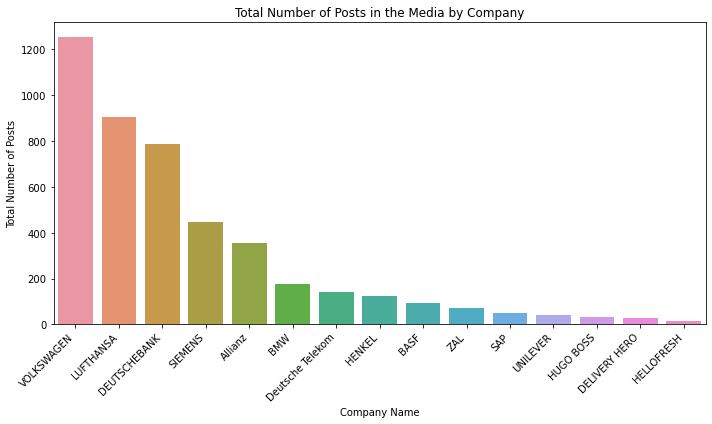

In [20]:
merged_data['length'] = pd.to_numeric(merged_data['length'], errors='coerce')
total_posts_by_company = pd.DataFrame(merged_data.groupby('COMP')['length'].sum()).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='COMP', y='length', data=total_posts_by_company.sort_values(by = "length",ascending=False))
plt.title('Total Number of Posts in the Media by Company')
plt.xlabel('Company Name')
plt.ylabel('Total Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* This graph shows the percent of days out of all days when at least 1 post about the company is available

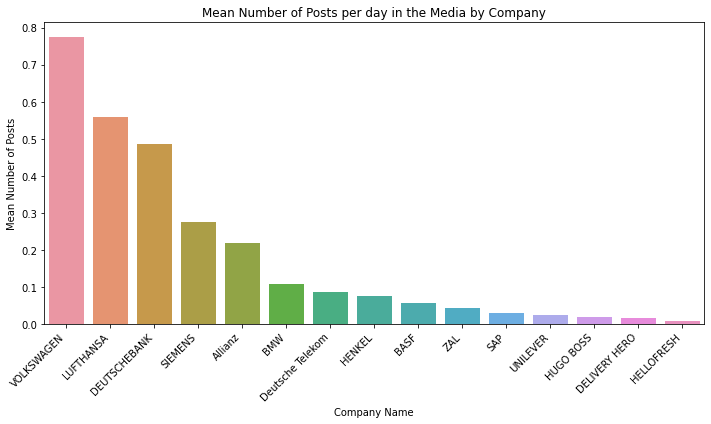

In [21]:
merged_data['length'] = pd.to_numeric(merged_data['length'], errors='coerce')
total_posts_by_company = pd.DataFrame(merged_data.groupby('COMP')['length'].mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='COMP', y='length', data=total_posts_by_company.sort_values(by = "length",ascending=False))
plt.title('Mean Number of Posts per day in the Media by Company')
plt.xlabel('Company Name')
plt.ylabel('Mean Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* for the future we can add more data on german Zeitungen if the existing text data is not enough